### BDA Project

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline
pd.options.mode.chained_assignment = None

In [53]:
train_df = pd.read_json("input/train.json")
train_df.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


In [27]:
test_df = pd.read_json("input/test.json")
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])
train_df.describe()

Train Rows :  49352
Test Rows :  74659


,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


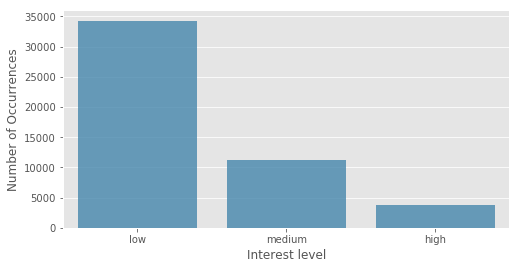

In [28]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

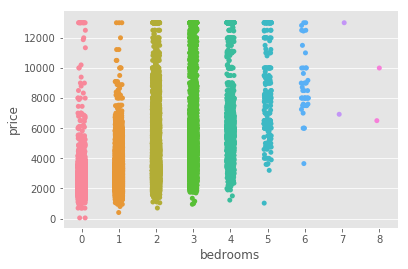

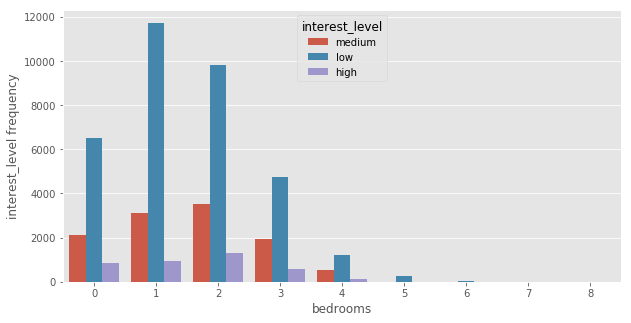

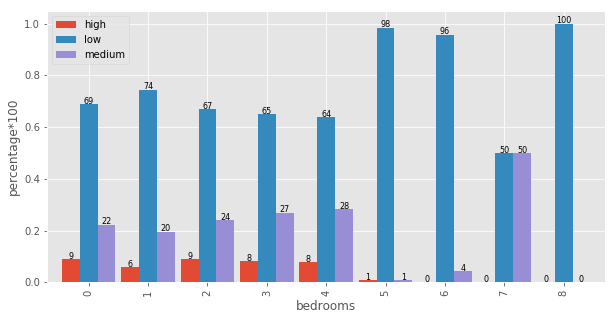

In [32]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

sns.stripplot(x="bedrooms", y="price",data=train_df,jitter=True);

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('interest_level frequency', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

f = lambda x: x.value_counts()/x.shape[0]
s = train_df.groupby('bedrooms').interest_level.apply(f)
s = s.unstack(level = -1)

fig, ax = plt.subplots(figsize=(10,5))
s.plot.bar(width = .9, ax = ax)
for p in ax.patches: 
    ax.annotate(int(np.round(p.get_height()*100)), (p.get_x()+p.get_width()/2., p.get_height()), \
                ha='center', va='center', xytext=(0, 3), size = 8, textcoords='offset points') 

plt.legend(loc = 0)
plt.ylabel("percentage*100")

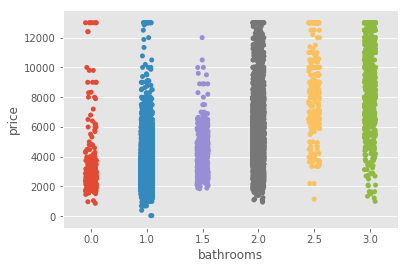

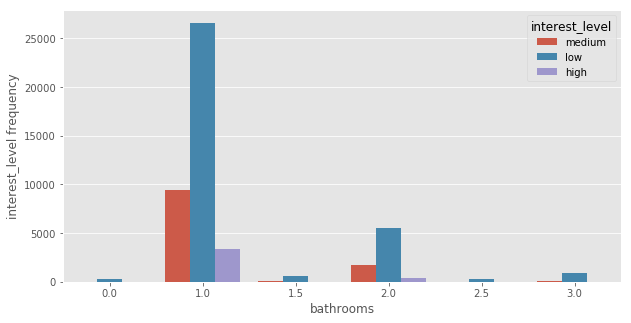

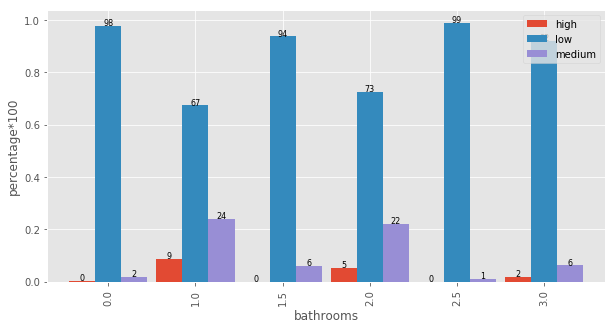

In [19]:
sns.stripplot(x="bathrooms", y="price",data=train_df,jitter=True);

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='bathrooms', hue='interest_level', data=train_df)
plt.ylabel('interest_level frequency', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

s = train_df.groupby('bathrooms').interest_level.apply(f)
s = s.unstack(level = -1)

fig, ax = plt.subplots(figsize=(10,5))
s.plot.bar(width = .9, ax = ax)
for p in ax.patches: 
    ax.annotate(int(np.round(p.get_height()*100)), (p.get_x()+p.get_width()/2., p.get_height()), \
                ha='center', va='center', xytext=(0, 3), size = 8, textcoords='offset points') 

plt.legend(loc = 0)
plt.ylabel("percentage*100")

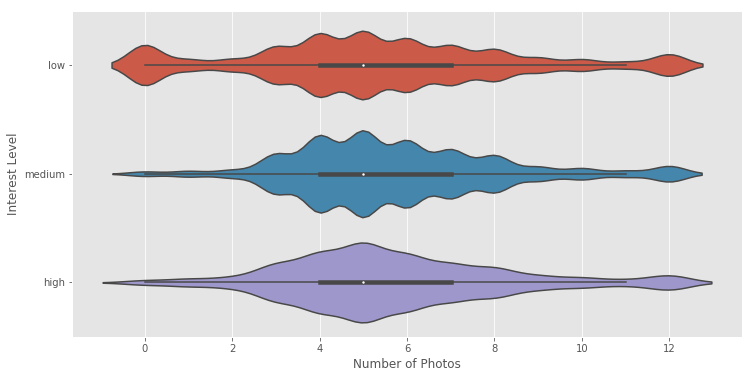

In [31]:
train_df["num_photos"] = train_df["photos"].apply(len)
train_df['num_photos'].ix[train_df['num_photos']>12] = 12
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

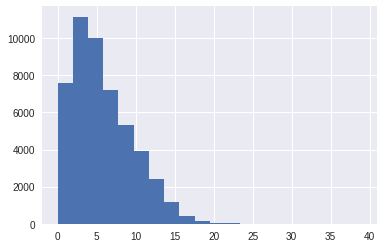

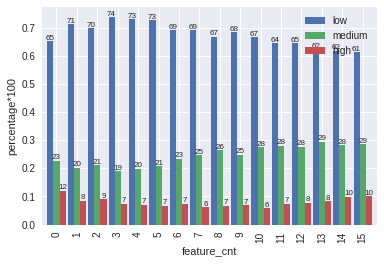

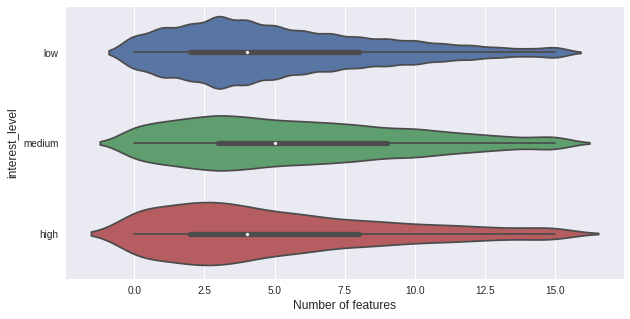

In [8]:
train_df['feature_cnt'] = train_df.features.map(lambda x: len(x))
train_df['feature_cnt'].hist(bins = 20)

train_df['feature_cnt'] = np.where(train_df['feature_cnt']<=15, train_df['feature_cnt'], 15)

f = lambda x: x.value_counts()/x.shape[0]
s = train_df.groupby('feature_cnt').interest_level.apply(f)
s = s.unstack(level = -1)

fig, ax = plt.subplots()
s.plot.bar(width = .9, ax = ax)
for p in ax.patches: 
    ax.annotate(int(np.round(p.get_height()*100)), (p.get_x()+p.get_width()/2., p.get_height()), \
                ha='center', va='center', xytext=(0, 3), size = 8, textcoords='offset points') 

plt.legend(loc = 0)
plt.ylabel("percentage*100")

plt.figure(figsize=(10, 5))
sns.violinplot(x="feature_cnt", y="interest_level", data=train_df, order =['low','medium','high'])
plt.ylabel('interest_level', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

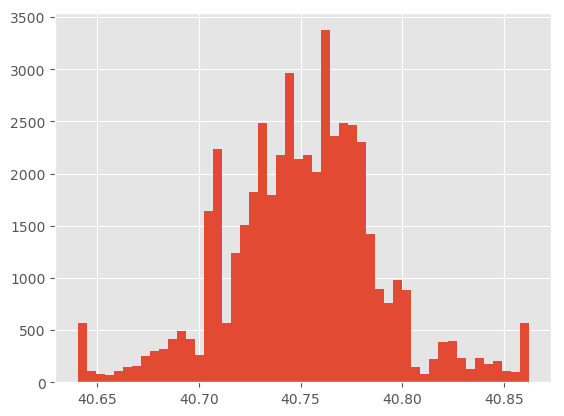

In [60]:
latitude_max = np.percentile(train_df.latitude, 99)
latitude_min = np.percentile(train_df.latitude, 1)
train_df.loc[train_df.latitude > latitude_max, 'latitude'] = latitude_max
train_df.loc[train_df.latitude < latitude_min, 'latitude'] = latitude_min
train_df.latitude.hist(bins=50)

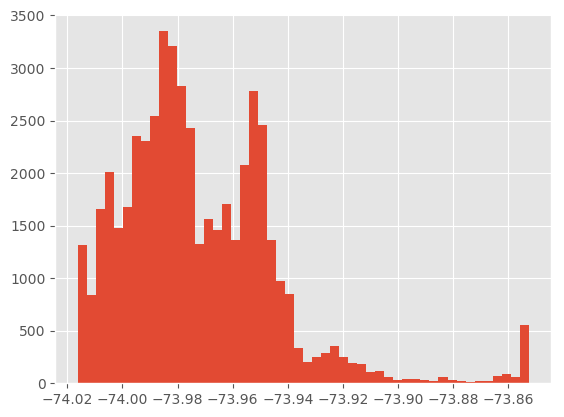

In [61]:
longitude_max = np.percentile(train_df.longitude, 99)
longitude_min = np.percentile(train_df.longitude, 1)
train_df.loc[train_df.longitude > longitude_max, 'longitude'] = longitude_max
train_df.loc[train_df.longitude < longitude_min, 'longitude'] = longitude_min
train_df.longitude.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5827f34908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f582a18fcc0>]], dtype=object)

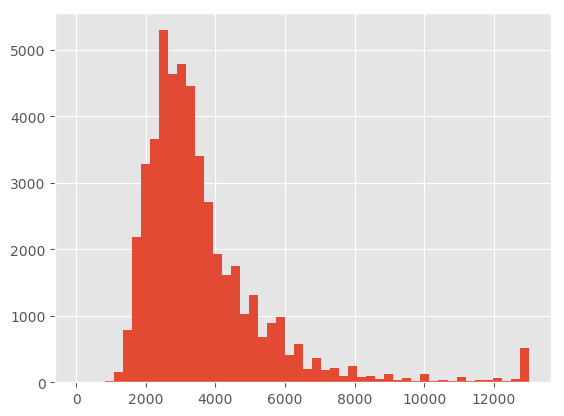

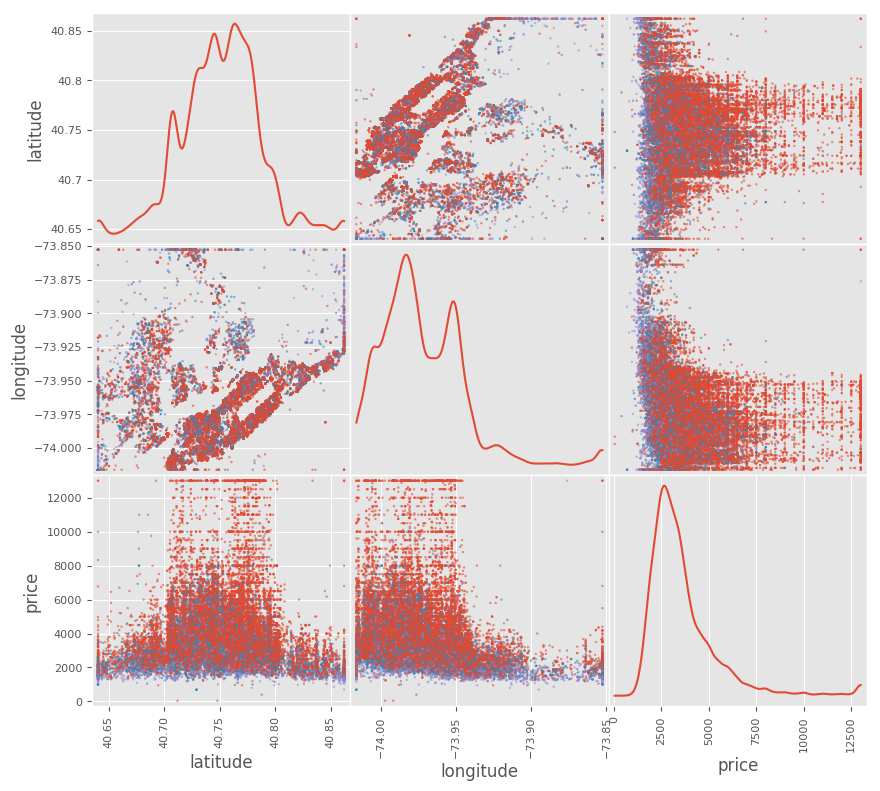

In [62]:
price_max = np.percentile(train_df.price, 99)
train_df.loc[train_df.price > price_max, 'price'] = price_max
train_df.price.hist(bins=50)

plt.rcdefaults()
plt.style.use('ggplot')
current_palette = sns.color_palette()
train_df['interest_level_coded'] = train_df.interest_level.map({'low': 0, 'medium': 1, 'high':2})
cmapping = train_df.interest_level_coded.map({i: current_palette[i] for i in [0, 1, 2]})
pd.scatter_matrix(train_df[['latitude', 'longitude', 'price']], figsize=[10, 9], s=6, c=cmapping, diagonal='kde')

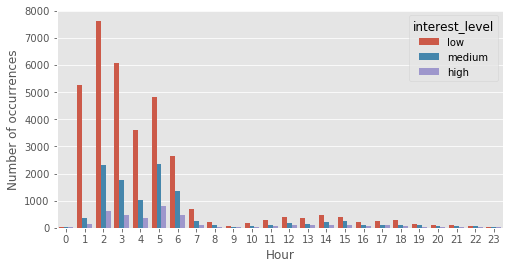

In [21]:
train_df['created'] = pd.to_datetime(train_df['created'])
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

fig = plt.figure(figsize=(8,4))
sns.countplot(x="hour_created", hue="interest_level", hue_order=['low', 'medium', 'high'], data=train_df);
plt.xlabel('Hour');
plt.ylabel('Number of occurrences');

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)
%matplotlib inline

from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure,show
output_notebook()

##******************
p = figure(title="interest level based on geography",y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p.xaxis.axis_label = 'latitude'
p.yaxis.axis_label = 'longitude'
lowLat=train_df['latitude'][train_df['interest_level']=='low']
lowLong=train_df['longitude'][train_df['interest_level']=='low']
medLat=train_df['latitude'][train_df['interest_level']=='medium']
medLong=train_df['longitude'][train_df['interest_level']=='medium']
highLat=train_df['latitude'][train_df['interest_level']=='high']
highLong=train_df['longitude'][train_df['interest_level']=='high']
p.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.1,legend='low')
p.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.1,legend='med')
p.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.1,legend='high')
show(p, notebook_handle=True)

##***************

Loading BokehJS ...

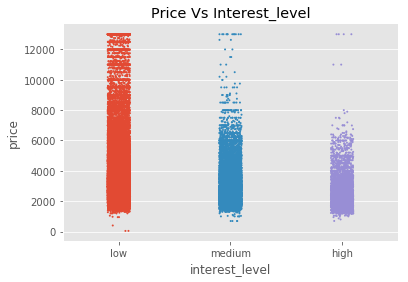

In [51]:
order = ['low', 'medium', 'high']
sns.stripplot(train_df["interest_level"], train_df['price'], jitter=True, order=order, size = 2)
plt.title("Price Vs Interest_level");

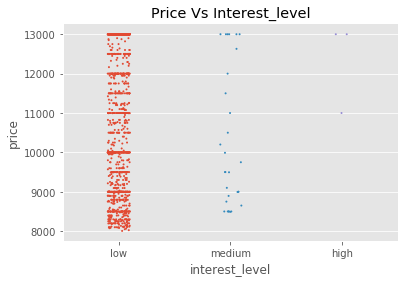

In [52]:
sns.stripplot(train_df["interest_level"], train_df['price'].ix[train_df['price']>8000], jitter=True, order=order, size = 2)
plt.title("Price Vs Interest_level");

In [36]:
Lat25=train_df['latitude'][train_df['price']<4000]
Long25=train_df['longitude'][train_df['price']<4000]
Lat40=train_df['latitude'][(train_df['price']<8000)&(train_df['price']>=4000)]
Long40=train_df['longitude'][(train_df['price']<8000)&(train_df['price']>=4000)]
Latup=train_df['latitude'][(train_df['price']>8000)]
Longup=train_df['longitude'][(train_df['price']>8000)]

p = figure(title="Cost",y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p.xaxis.axis_label = 'latitude'
p.yaxis.axis_label = 'longitude'

p.circle(Long25,Lat25,size=3,color=rainbow.as_hex()[2],fill_alpha=0.6,line_alpha=0.6,legend='<$4000')
p.circle(Long40,Lat40,size=3,color=plasma.as_hex()[4],fill_alpha=0.6,line_alpha=0.6,legend='>$4000')
p.circle(Longup,Latup,size=3,color=rainbow.as_hex()[5],fill_alpha=0.6,line_alpha=0.6,legend='>8000')
p.legend.location = 'bottom_right'
show(p, notebook_handle=True)